# Data Science Project Workflow

## Project Overview
- **Objective**: Define the problem and goals of the project.
- **Milestones**: Data Collection, Exploration, Preprocessing, Advanced Analysis, Model Development, Deployment, and Final Documentation.

---

## Domain and Research Questions

### Domain of the Project
    Financial Market Predictions
### Research Questions to be Answered
1. **Question 1**: Did the Covid pandemic have any effect on the apple stocks ?
2. **Question 2**: Did the event of 9/11 affect apple stocks ?
3. **Question 3**: Is there a massive difference between the release of the first iPhone and the last iPhone?


# Team Information

## Student Information
- **Name**: Seif  
- **Email**: yesso.2004@gmail.com  
- **Role**: Data Science Student  
- **Institution**: TKH: Coventry University

## Additional Information
- **Project Timeline**: [16/2/2025 - Week 12]  
- **Tools Used**: python Requests BeautifulSoup Selenium Pandas NumPy
- **Advisor/Instructor**: Dr.Mostafa & Dr.Batoul  

# Milestone 1: Data Collection, Exploration, and Preprocessing

## Data Collection
- Acquire a dataset from reliable sources (e.g., Kaggle, UCI Repository, or APIs).
- **Scraping Data**:
  - Increase dataset size through web scraping or APIs (e.g., Selenium, BeautifulSoup).
  - Explore public repositories or other accessible sources for additional data.

Scraping Apple Website for stock Data (85 minutes in total run time)

In [7]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import Select, WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from webdriver_manager.chrome import ChromeDriverManager
import csv

with open('NewData.csv', mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Date', 'Open Price', 'High Price', 'Low Price', 'Close Price', 'Volume'])

    driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))
    driver.get('https://investor.apple.com/stock-price/default.aspx')

    WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CSS_SELECTOR, 'select[aria-label="year"]')))

    Monthtranslator = {
        'Jan': '1', 'Feb': '2', 'Mar': '3', 'Apr': '4', 'May': '5', 'Jun': '6',
        'Jul': '7', 'Aug': '8', 'Sep': '9', 'Oct': '10', 'Nov': '11', 'Dec': '12'
    }

    for year in ['2024', '2025']:
        Year = Select(driver.find_element(By.CSS_SELECTOR, 'select[aria-label="year"]'))
        Year.select_by_visible_text(year)

        Month = Select(driver.find_element(By.CSS_SELECTOR, 'select[aria-label="month"]'))

        for Monthoption in Month.options:
            month_text = Monthoption.text.strip()
            Month.select_by_visible_text(month_text)

            Day = Select(driver.find_element(By.CSS_SELECTOR, 'select[aria-label="day"]'))

            for Dayoption in Day.options:
                day_text = Dayoption.text.strip()

                if day_text:
                    formatted_date = f"{Monthtranslator[month_text]}/{int(day_text)}/{year}"
                    
                    try:
                        Year = Select(driver.find_element(By.CSS_SELECTOR, 'select[aria-label="year"]'))
                        Month = Select(driver.find_element(By.CSS_SELECTOR, 'select[aria-label="month"]'))
                        Day = Select(driver.find_element(By.CSS_SELECTOR, 'select[aria-label="day"]'))

                        Year.select_by_visible_text(year)
                        Month.select_by_visible_text(month_text)
                        Day.select_by_visible_text(day_text)

                        LookUpBtn = WebDriverWait(driver, 10).until(
                            EC.element_to_be_clickable((By.CLASS_NAME, 'module_options-submit'))
                        )
                        LookUpBtn.click()

                        WebDriverWait(driver, 10).until(
                            EC.presence_of_all_elements_located((By.CSS_SELECTOR, 'li.module-stock-historical_item'))
                        )

                        StockPrices = driver.find_elements(By.CSS_SELECTOR, 'li.module-stock-historical_item')

                        if len(StockPrices) < 5:
                            print(f"Data not available for {formatted_date}, setting values to NULL")
                            writer.writerow([formatted_date, None, None, None, None, None])
                            continue

                        OpenPrice = StockPrices[0].find_element(By.CSS_SELECTOR, 'span.module-stock_value').text
                        ClosePrice = StockPrices[1].find_element(By.CSS_SELECTOR, 'span.module-stock_value').text
                        Volume = StockPrices[2].find_element(By.CSS_SELECTOR, 'span.module-stock_value').text
                        HighPrice = StockPrices[3].find_element(By.CSS_SELECTOR, 'span.module-stock_value').text
                        LowPrice = StockPrices[4].find_element(By.CSS_SELECTOR, 'span.module-stock_value').text

                        writer.writerow([formatted_date, OpenPrice, HighPrice, LowPrice, ClosePrice, Volume])

                        print(f"Stock data for {formatted_date}:")
                        print(f"Open: {OpenPrice}")
                        print(f"High: {HighPrice}")
                        print(f"Low: {LowPrice}")
                        print(f"Close: {ClosePrice}")
                        print(f"Volume: {Volume}")
                        print("-" * 50)

                    except Exception as e:
                        writer.writerow([formatted_date, None, None, None, None, None])
                        continue

    driver.quit()


Stock data for 1/2/2024:
Open: 187.15
High: 188.44
Low: 183.88
Close: 185.64
Volume: 82.5
--------------------------------------------------
Stock data for 1/3/2024:
Open: 184.22
High: 185.88
Low: 183.43
Close: 184.25
Volume: 58.4
--------------------------------------------------
Stock data for 1/4/2024:
Open: 182.15
High: 183.09
Low: 180.88
Close: 181.91
Volume: 72.0
--------------------------------------------------
Stock data for 1/5/2024:
Open: 181.99
High: 182.76
Low: 180.17
Close: 181.18
Volume: 62.4
--------------------------------------------------
Stock data for 1/8/2024:
Open: 182.09
High: 185.60
Low: 181.50
Close: 185.56
Volume: 59.1
--------------------------------------------------
Stock data for 1/9/2024:
Open: 183.92
High: 185.15
Low: 182.73
Close: 185.14
Volume: 42.8
--------------------------------------------------
Stock data for 1/10/2024:
Open: 184.35
High: 186.40
Low: 183.92
Close: 186.19
Volume: 46.8
--------------------------------------------------
Stock data f

Combining Kaggle Datatset with the scraped data i got for a more complete dataset

In [76]:
import pandas as pd

AppleDataSet = pd.read_csv("Apple stocks.csv")
ScrapedStocks = pd.read_csv("NewData.csv")

AppleStocks = pd.concat([AppleDataSet,ScrapedStocks[264:]])

AppleStocks.to_csv("AppleData.csv",index = False)

print(AppleStocks)



           Date  Open Price  High Price  Low Price  Close Price     Volume
0     11/1/1999       80.00       80.69      77.37        77.62  2487300.0
1     11/2/1999       78.00       81.69      77.31        80.25  3564600.0
2     11/3/1999       81.62       83.25      81.00        81.50  2932700.0
3     11/4/1999       82.06       85.37      80.62        83.62  3384700.0
4     11/5/1999       84.62       88.37      84.00        88.31  3721500.0
..          ...         ...         ...        ...          ...        ...
726  12/27/2025         NaN         NaN        NaN          NaN        NaN
727  12/28/2025         NaN         NaN        NaN          NaN        NaN
728  12/29/2025         NaN         NaN        NaN          NaN        NaN
729  12/30/2025         NaN         NaN        NaN          NaN        NaN
730  12/31/2025         NaN         NaN        NaN          NaN        NaN

[6729 rows x 6 columns]


<div style="color: limegreen; font-weight: bold; font-size: 16px;">

In the code snippet above we read two different csv files and store them in variables  
**Appple stocks.csv**: a csv with real that was aquired by kaggle  
**NewData.csv**: a csv that was created by me using scraped data from apples's stocks website  
Then we concat the kaggle aquired data with the scraped data to have a more complete dataset

</div>


## Dataset Description
- Create a table to explain:
  - **Column Names**
  - **Data Types**
  - **Descriptions**
  - **Potential Use in Analysis**

Date: The date of the record

Open: Opening price of the stock.

High: Highest price of the stock for the day.

Low: Lowest price of the stock for the day.

Close: Closing price of the stock.

Volume: Number of shares traded.

In [77]:
AppleStocks.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6729 entries, 0 to 730
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         6729 non-null   object 
 1   Open Price   6386 non-null   float64
 2   High Price   6386 non-null   float64
 3   Low Price    6386 non-null   float64
 4   Close Price  6386 non-null   float64
 5   Volume       6386 non-null   float64
dtypes: float64(5), object(1)
memory usage: 368.0+ KB


<div style="color: limegreen; font-weight: bold; font-size: 16px;">

display info about the dataset such as column names / data types / null precense

</div>


## Data Exploration
- Summary statistics (mean, median, variance).
- Identify missing values, duplicates, and outliers.
- Data distribution visualizations: histograms, box plots, scatter plots.

In [78]:
AppleStocks.describe()

,Open Price,High Price,Low Price,Close Price,Volume
count,6386.000000,6386.000000,6386.000000,6386.000000,6.386000e+03
mean,175.207108,177.144028,173.178121,175.223114,3.246514e+07
std,146.138078,147.342607,144.739287,146.077722,3.066607e+07
min,12.990000,13.190000,12.720000,13.120000,2.320000e+01
25%,81.652500,82.622500,80.147500,81.560000,1.112000e+07
50%,141.270000,143.125000,139.535000,141.255000,2.396305e+07
75%,209.097500,210.945000,207.162500,209.062500,4.376283e+07
max,702.410000,705.070000,699.570000,702.100000,3.326072e+08


<div style="color: limegreen; font-weight: bold; font-size: 16px;">

displays statistcal functions to the dataset 

</div>


## Preprocessing and Feature Engineering
- Handle missing values.
- Remove duplicates and outliers.
- Apply transformations (scaling, encoding, feature interactions).

Add NULL string to missing values to look cleaner (optional)

In [79]:
AppleData = pd.read_csv("AppleData.csv")

AppleData = AppleData.where(pd.notna(AppleData), None) # Replace NaN with None

for index ,row in AppleData.iterrows():
    if row.iloc[1:].isnull().all(): # Check if all values in the row are NULL
        AppleData.loc[index,AppleData.columns[1:]] = "NULL" # Replace NULL with "NULL"
        
AppleData.to_csv("AppleData.csv",index=False)

print(AppleData)

C:\Users\medoo\AppData\Local\Temp\ipykernel_18520\1099306055.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'NULL' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  AppleData.loc[index,AppleData.columns[1:]] = "NULL" # Replace NULL with "NULL"
C:\Users\medoo\AppData\Local\Temp\ipykernel_18520\1099306055.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'NULL' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  AppleData.loc[index,AppleData.columns[1:]] = "NULL" # Replace NULL with "NULL"
C:\Users\medoo\AppData\Local\Temp\ipykernel_18520\1099306055.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'NULL' has dtype incompatible with float64, please explicitly

            Date Open Price High Price Low Price Close Price     Volume
0      11/1/1999       80.0      80.69     77.37       77.62  2487300.0
1      11/2/1999       78.0      81.69     77.31       80.25  3564600.0
2      11/3/1999      81.62      83.25      81.0        81.5  2932700.0
3      11/4/1999      82.06      85.37     80.62       83.62  3384700.0
4      11/5/1999      84.62      88.37      84.0       88.31  3721500.0
...          ...        ...        ...       ...         ...        ...
6724  12/27/2025       NULL       NULL      NULL        NULL       NULL
6725  12/28/2025       NULL       NULL      NULL        NULL       NULL
6726  12/29/2025       NULL       NULL      NULL        NULL       NULL
6727  12/30/2025       NULL       NULL      NULL        NULL       NULL
6728  12/31/2025       NULL       NULL      NULL        NULL       NULL

[6729 rows x 6 columns]


<div style="color: limegreen; font-weight: bold; font-size: 16px;">

Makes all the null values in the dataset have the string NULL written (optional)

</div>


In [80]:
AppleData[AppleData["High Price"] == "NULL"]

,Date,Open Price,High Price,Low Price,Close Price,Volume
6262,9/21/2024,NULL,NULL,NULL,NULL,NULL
6263,9/22/2024,NULL,NULL,NULL,NULL,NULL
6269,9/28/2024,NULL,NULL,NULL,NULL,NULL
6270,9/29/2024,NULL,NULL,NULL,NULL,NULL
6276,10/5/2024,NULL,NULL,NULL,NULL,NULL
...,...,...,...,...,...,...
6724,12/27/2025,NULL,NULL,NULL,NULL,NULL
6725,12/28/2025,NULL,NULL,NULL,NULL,NULL
6726,12/29/2025,NULL,NULL,NULL,NULL,NULL
6727,12/30/2025,NULL,NULL,NULL,NULL,NULL


<div style="color: limegreen; font-weight: bold; font-size: 16px;">

Displays all the NULL values in the dataset

</div>


Delete all Data with Null string or empty as they are missing values

In [81]:
import pandas as pd

AppleData = pd.read_csv("AppleData.csv", dtype=str)

AppleData = AppleData[~AppleData.iloc[:, 1:].isna().all(axis=1)]  
AppleData = AppleData[~(AppleData.iloc[:, 1:] == "NULL").all(axis=1)] 

AppleData = AppleData.drop_duplicates()

AppleData.to_csv("AppleData.csv", index=False)

AppleData


,Date,Open Price,High Price,Low Price,Close Price,Volume
0,11/1/1999,80.0,80.69,77.37,77.62,2487300.0
1,11/2/1999,78.0,81.69,77.31,80.25,3564600.0
2,11/3/1999,81.62,83.25,81.0,81.5,2932700.0
3,11/4/1999,82.06,85.37,80.62,83.62,3384700.0
4,11/5/1999,84.62,88.37,84.0,88.31,3721500.0
...,...,...,...,...,...,...
6439,3/17/2025,213.31,215.22,209.97,214.0,48.1
6440,3/18/2025,214.16,215.15,211.49,212.69,42.4
6441,3/19/2025,214.22,218.76,213.75,215.24,54.4
6442,3/20/2025,213.99,217.49,212.22,214.1,48.9


<div style="color: limegreen; font-weight: bold; font-size: 16px;">

Deletes all values that null or have the string NULL written into it and the removal of duplicate values if any existed

</div>


When combining the scraped data with the original dataset the values where for example 52M so i basically just multiplied them to scale the data correctly

In [82]:
AppleData =pd.read_csv("AppleData.csv")

AppleData.iloc[6262:, 5] = AppleData.iloc[6262:, 5].apply(pd.to_numeric, errors='coerce') * 1000000

AppleData.to_csv("AppleData.csv",index=False)

print(AppleData)



           Date  Open Price  High Price  Low Price  Close Price      Volume
0     11/1/1999       80.00       80.69      77.37        77.62   2487300.0
1     11/2/1999       78.00       81.69      77.31        80.25   3564600.0
2     11/3/1999       81.62       83.25      81.00        81.50   2932700.0
3     11/4/1999       82.06       85.37      80.62        83.62   3384700.0
4     11/5/1999       84.62       88.37      84.00        88.31   3721500.0
...         ...         ...         ...        ...          ...         ...
6381  3/17/2025      213.31      215.22     209.97       214.00  48100000.0
6382  3/18/2025      214.16      215.15     211.49       212.69  42400000.0
6383  3/19/2025      214.22      218.76     213.75       215.24  54400000.0
6384  3/20/2025      213.99      217.49     212.22       214.10  48900000.0
6385  3/21/2025      211.56      218.84     211.28       218.27  94100000.0

[6386 rows x 6 columns]


<div style="color: limegreen; font-weight: bold; font-size: 16px;">

Scale the data that was scraped since numeric data  like a 1000000 was transalted as 1M in the scraped data

</div>


Check For Duplicate Values

In [83]:
Duplicate = AppleData[AppleData.duplicated(subset=['Date'])]

print(Duplicate)

Empty DataFrame
Columns: [Date, Open Price, High Price, Low Price, Close Price, Volume]
Index: []


<div style="color: limegreen; font-weight: bold; font-size: 16px;">

displays if any duplicates exist 

</div>


Indentifying the Outlier

In [84]:

AppleData["Date"] = pd.to_datetime(AppleData["Date"], format='%m/%d/%Y')
AppleData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6386 entries, 0 to 6385
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         6386 non-null   datetime64[ns]
 1   Open Price   6386 non-null   float64       
 2   High Price   6386 non-null   float64       
 3   Low Price    6386 non-null   float64       
 4   Close Price  6386 non-null   float64       
 5   Volume       6386 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 299.5 KB


<div style="color: limegreen; font-weight: bold; font-size: 16px;">

turn the date column to datetime format for later feature engineering

</div>


In [85]:
AppleData["year"] = AppleData["Date"].dt.year
AppleData["month"] = AppleData["Date"].dt.month
AppleData["day"] = AppleData["Date"].dt.day

AppleData.to_csv("AppleData.csv", index=False)

<div style="color: limegreen; font-weight: bold; font-size: 16px;">
Applying Feature engineering by making 3 columns one for day / month /year
</div>


# Milestone 2: Advanced Data Analysis and Feature Engineering

## Statistical Analysis
- Conduct tests such as t-tests, ANOVA, and chi-squared to explore relationships.

In [86]:
import scipy.stats as sta

AppleData["Date"] = pd.to_datetime(AppleData["Date"]) # Convert to datetime

AppleData2017 = AppleData[AppleData["Date"].dt.year == 2017]["Open Price"] # Extracting Open Price for 2017
AppleData2018 = AppleData[AppleData["Date"].dt.year == 2018]["Open Price"] # Extracting Open Price for 2018

TStatistic,ProbabilityValue = sta.ttest_ind(AppleData2017,AppleData2018,equal_var= False) # Perform t-test

print(f"T Statistics: {TStatistic:.2f}")
print(f"PValue: {ProbabilityValue}")


alpha = 0.05  # Significance level
if ProbabilityValue < alpha:
    print("Significant difference in stock prices between 2017 and 2018!")
else:
    print("No significant difference in stock prices between 2017 and 2018.")

T Statistics: -24.25
PValue: 6.036581397865411e-84
Significant difference in stock prices between 2017 and 2018!


<div style="color: limegreen; font-weight: bold; font-size: 16px;">
Here we perform an indenpendent-test for the means of the open price of both 2017 and 2018 to see if there is a significant difference between them
T-statistic: checks the measure of difference between the sample means in terms of standard error
PValue: a probability that helps whether whether the difference between the sample means is statistically significant.
</div>


## Feature Engineering
- Create derived features based on domain knowledge.
- Apply transformations such as normalization, log scaling, or polynomial features.

In [87]:
# Check code snippet 9 and 10 as it holds the feature engineering 

## Data Visualization
- Generate insightful visualizations:
  - Correlation heatmaps, pair plots.
  - Trends and comparisons using bar charts, line charts, and dashboards.

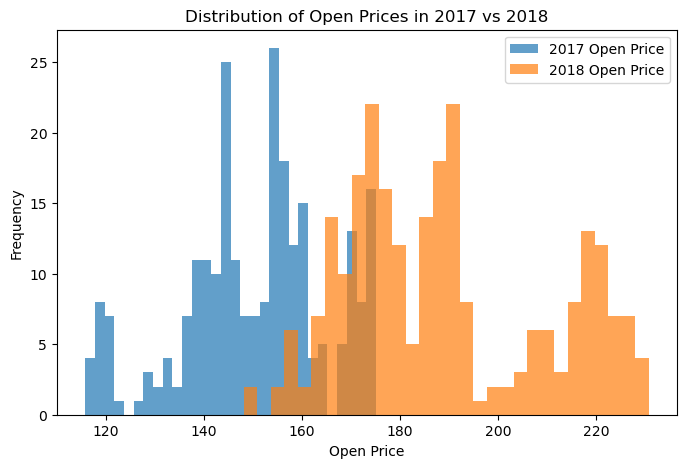

In [89]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.hist(AppleData2017, bins=30, alpha=0.7, label='2017 Open Price')
plt.hist(AppleData2018, bins=30, alpha=0.7, label='2018 Open Price')
plt.title("Distribution of Open Prices in 2017 vs 2018")
plt.xlabel("Open Price")
plt.ylabel("Frequency")
plt.legend()
plt.show()

<div style="color: limegreen; font-weight: bold; font-size: 16px;">
Histogram of frequency of days where open prices reached a certaiin value for both 2017 and 2018
</div>



---


# Milestone 3: Machine Learning Model Development and Optimization

## Model Selection
- Choose appropriate models for the problem type (classification, regression, clustering, etc.).


In [90]:
import pandas as pd

Data = pd.read_csv("AppleData.csv")
print(Data.tail())

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score
import joblib



            Date  Open Price  High Price  Low Price  Close Price      Volume  \
6381  2025-03-17      213.31      215.22     209.97       214.00  48100000.0   
6382  2025-03-18      214.16      215.15     211.49       212.69  42400000.0   
6383  2025-03-19      214.22      218.76     213.75       215.24  54400000.0   
6384  2025-03-20      213.99      217.49     212.22       214.10  48900000.0   
6385  2025-03-21      211.56      218.84     211.28       218.27  94100000.0   

      year  month  day  
6381  2025      3   17  
6382  2025      3   18  
6383  2025      3   19  
6384  2025      3   20  
6385  2025      3   21  


In [91]:
X = Data[["Volume","year","month","day"]]
Y = Data["Open Price"]

## Model Training
- Split data into training, validation, and testing sets.
- Address imbalances using techniques like SMOTE or stratified sampling.

In [94]:
model = RandomForestRegressor(n_estimators=100, random_state=0)
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y,test_size=0.25,random_state=0)
model.fit(Xtrain,Ytrain)
Ypred = model.predict(Xtest)

joblib.dump(model,"AppleStockPricePredictionModel.pkl")


['AppleStockPricePredictionModel.pkl']

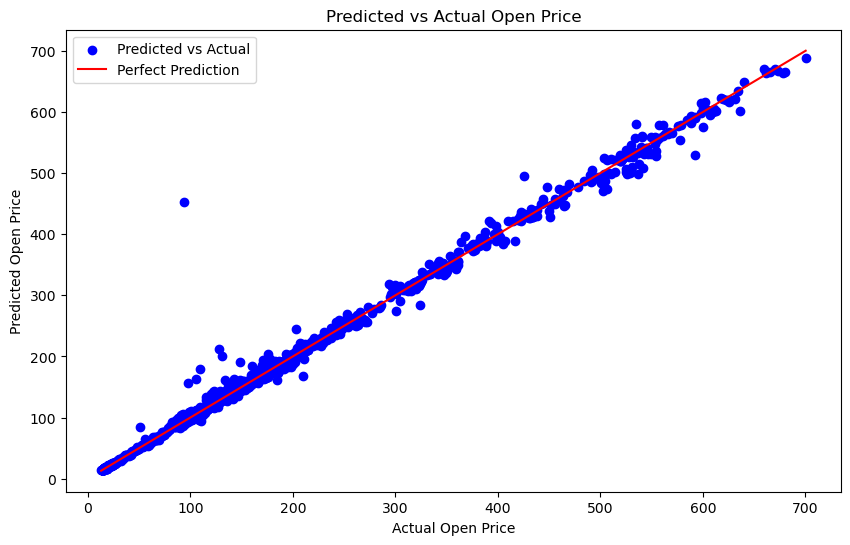

In [95]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(Ytest,Ypred, color='blue', label='Predicted vs Actual')

plt.plot([Ytest.min(), Ytest.max()], [Ytest.min(), Ytest.max()], color='red', linestyle='solid', label='Perfect Prediction')
plt.xlabel('Actual Open Price')
plt.ylabel('Predicted Open Price')
plt.title('Predicted vs Actual Open Price')
plt.legend()
plt.show()

## Model Evaluation
- Metrics to consider: Accuracy, Precision, Recall, F1-score, RMSE, etc.
- Visual tools: Confusion matrices, ROC curves.

In [96]:
r2 = r2_score(Ytest, Ypred)
print(f"R² Score: {r2:.2f}")
print(f"Model Accuracy (R²): {r2 * 100:.2f}%")

R² Score: 0.99
Model Accuracy (R²): 99.31%


## Model Comparison
- Compare multiple models and justify the final model selection.

In [97]:
LinearModel = LinearRegression()
LinearModel.fit(Xtrain,Ytrain)
Ypred = LinearModel.predict(Xtest)

Linearr2 = r2_score(Ytest, Ypred)
print(f"Linear Model R² Score: {Linearr2*100:.2f}%")

Linear Model R² Score: 25.18%


In [105]:
print(f"Model Accuracy (R²)(Forest Regression): {r2 * 100:.2f}%")
print(f"Model Accuracy with (Linear Regression): {Linearr2 * 100:.2f}%")


Model Accuracy (R²)(Forest Regression): 99.31%
Model Accuracy with (Linear Regression): 25.18%


## Visualization for Research Questions
- This section will include the visualizations that provide insights for the research questions defined earlier.  
- **Development Steps for Answering the Research Questions**:
  1. During **Exploratory Data Analysis (EDA)**, visualize initial patterns or trends related to the research questions.
  2. During **Model Evaluation**, provide visualizations to interpret model performance with respect to the research questions.
  3. During the **Final Analysis and Reporting**, present polished visualizations that summarize findings for each research question.

- Create the visualizations for each research question you defined, prove it or answer it, then add a markdown cell after each visual to comment and explain how the visual support your research question.

Did the Covid pandemic have any effect on the apple stocks ?

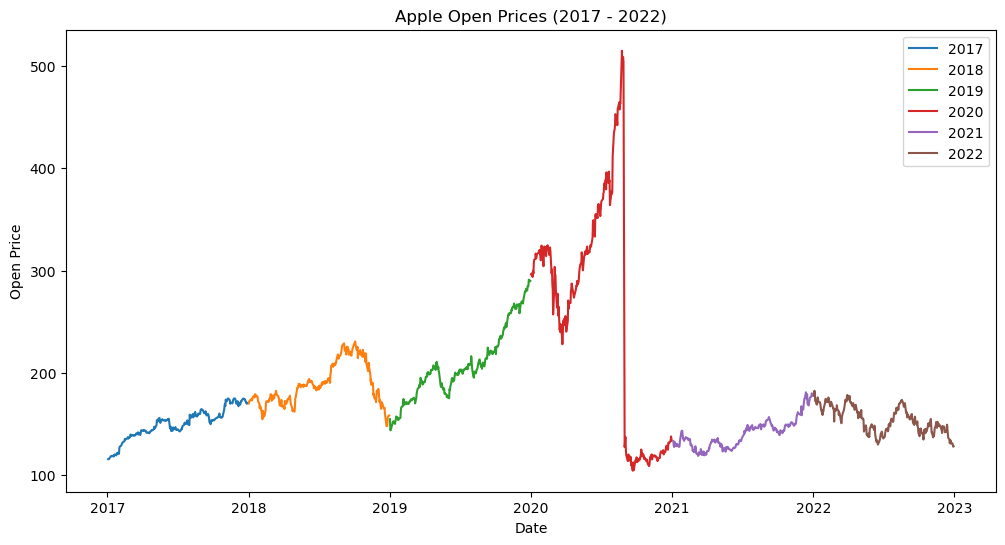

In [99]:
years = [2017, 2018, 2019, 2020, 2021, 2022]
AppleData["Year"] = AppleData["Date"].dt.year
Comparison = AppleData[AppleData["Year"].isin(years)]

plt.figure(figsize=(12, 6))

for year in years:
    DataYears = Comparison[Comparison["Year"] == year].sort_values("Date")
    plt.plot(DataYears["Date"], DataYears["Open Price"], label=str(year))

plt.xlabel("Date")
plt.ylabel("Open Price")
plt.title("Apple Open Prices (2017 - 2022)")
plt.legend()
plt.show()



As we can see here that covid has hreatly affected apple stocks during the year 2020 

Did the event of 9/11 affect apple stocks ?

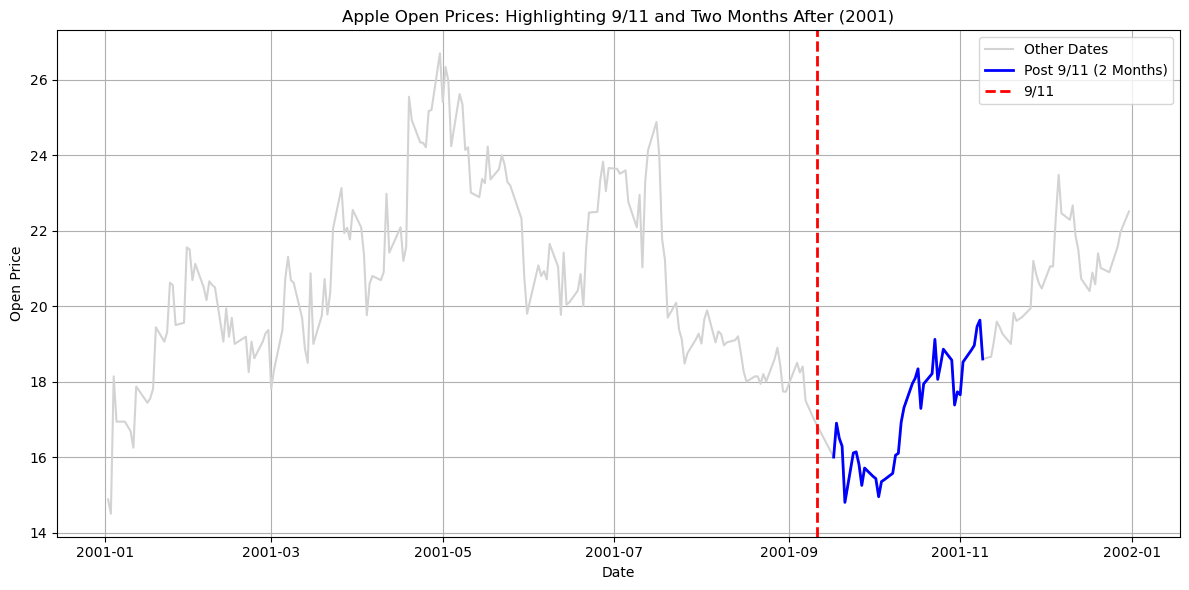

In [100]:
import pandas as pd
import matplotlib.pyplot as plt

AppleData["Date"] = pd.to_datetime(AppleData["Date"], format="%B %d %Y")
AppleData["Year"] = AppleData["Date"].dt.year
AppleData["Month"] = AppleData["Date"].dt.month

Apple2001 = AppleData[AppleData["Year"] == 2001]    

TargetDate = pd.Timestamp("2001-09-11")
EndDate = TargetDate + pd.DateOffset(months=2)

WantedData = Apple2001[(Apple2001["Date"] >= TargetDate) & (Apple2001["Date"] <= EndDate)]


plt.figure(figsize=(12, 6))
plt.plot(Apple2001["Date"], Apple2001["Open Price"], color='lightgray', label='Other Dates')
plt.plot(WantedData["Date"], WantedData["Open Price"], color='blue', linewidth=2, label='Post 9/11 (2 Months)')
plt.axvline(TargetDate, color='red', linestyle='--', linewidth=2, label='9/11')

plt.xlabel("Date")
plt.ylabel("Open Price")
plt.title("Apple Open Prices: Highlighting 9/11 and Two Months After (2001)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

It appears that apple stocks were really hurt by the tragic events of 9/11 as stocks goit hindered badly but recoverd with time

Have any Apple releases over the years impacted their stocks ? 

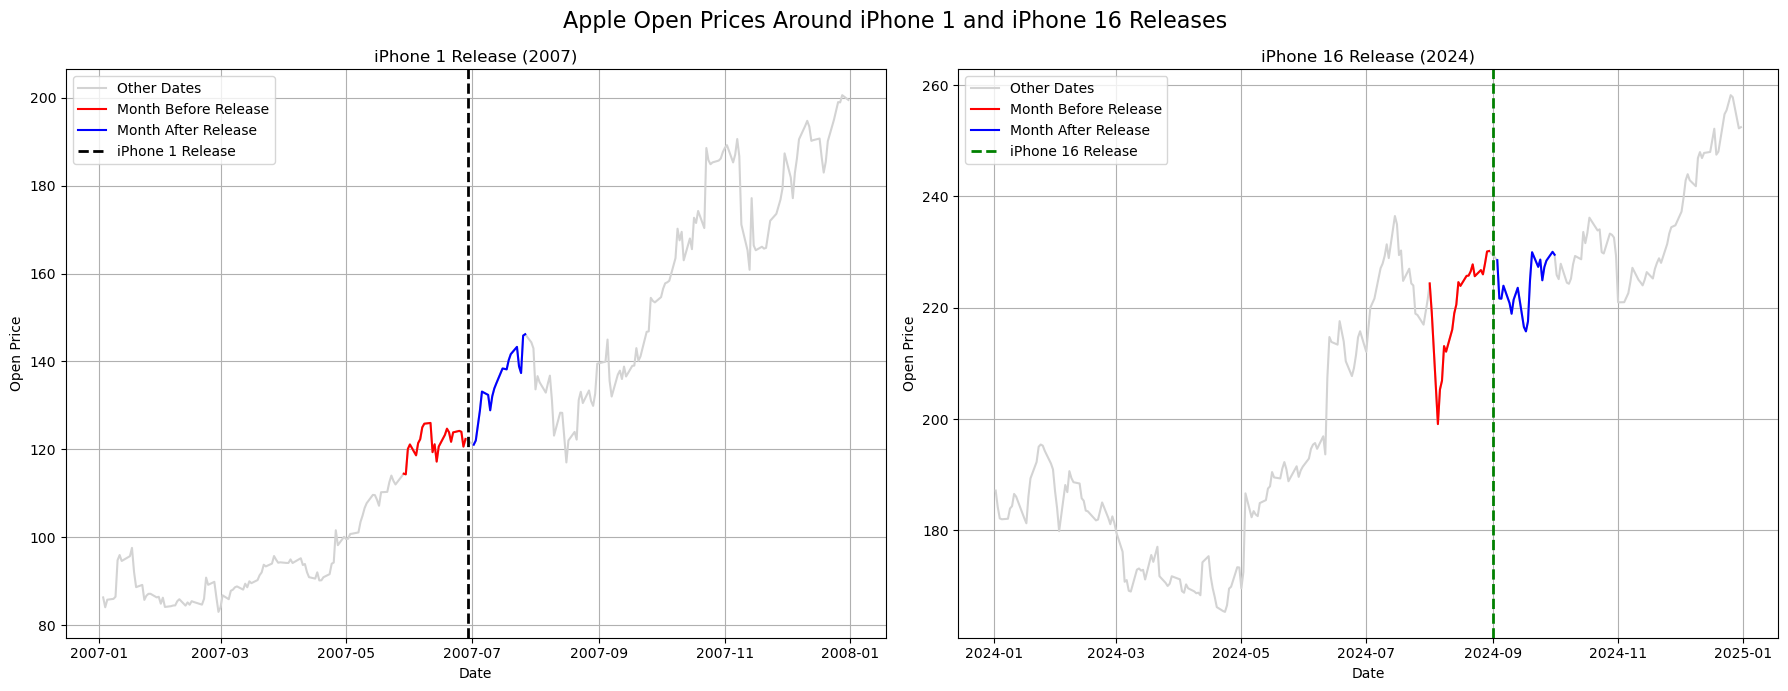

In [102]:
import pandas as pd
import matplotlib.pyplot as plt

AppleData = pd.read_csv("AppleData.csv")

AppleData["Date"] = pd.to_datetime(AppleData["Date"])
AppleData["Year"] = AppleData["Date"].dt.year
AppleData["Month"] = AppleData["Date"].dt.month

Iphone1Date = pd.Timestamp("2007-06-29")
Iphone16Date = pd.Timestamp("2024-09-01")

Iphone1PrevMonth = Iphone1Date - pd.DateOffset(months=1)
Iphone1NxtMonth = Iphone1Date + pd.DateOffset(months=1)

Iphone16PrevMonth = Iphone16Date - pd.DateOffset(months=1)
Iphone16NxtMonth = Iphone16Date + pd.DateOffset(months=1)

fig, Plots = plt.subplots(1, 2, figsize=(18, 7))
fig.suptitle("Apple Open Prices Around iPhone 1 and iPhone 16 Releases", fontsize=16)

Plot = Plots[0]
Apple2007 = AppleData[AppleData["Year"] == 2007]

Plot.plot(Apple2007["Date"], Apple2007["Open Price"], color='lightgray', label='Other Dates')

Iphone1Prev = Apple2007[(Apple2007["Date"] >= Iphone1PrevMonth) & (Apple2007["Date"] < Iphone1Date)]
Iphone1Nxt = Apple2007[(Apple2007["Date"] > Iphone1Date) & (Apple2007["Date"] <= Iphone1NxtMonth)]

Plot.plot(Iphone1Prev["Date"], Iphone1Prev["Open Price"], color='red', label='Month Before Release')
Plot.plot(Iphone1Nxt["Date"], Iphone1Nxt["Open Price"], color='blue', label='Month After Release')
Plot.axvline(Iphone1Date, color='black', linestyle='--', linewidth=2, label='iPhone 1 Release')

Plot.set_title("iPhone 1 Release (2007)")
Plot.set_xlabel("Date")
Plot.set_ylabel("Open Price")
Plot.legend()
Plot.grid(True)

Plot = Plots[1]
Apple2024 = AppleData[AppleData["Year"] == 2024]

Plot.plot(Apple2024["Date"], Apple2024["Open Price"], color='lightgray', label='Other Dates')

Iphone16Prev = Apple2024[(Apple2024["Date"] >= Iphone16PrevMonth) & (Apple2024["Date"] < Iphone16Date)]
Iphone16Nxt = Apple2024[(Apple2024["Date"] > Iphone16Date) & (Apple2024["Date"] <= Iphone16NxtMonth)]

Plot.plot(Iphone16Prev["Date"], Iphone16Prev["Open Price"], color='red', label='Month Before Release')
Plot.plot(Iphone16Nxt["Date"], Iphone16Nxt["Open Price"], color='blue', label='Month After Release')
Plot.axvline(Iphone16Date, color='green', linestyle='--', linewidth=2, label='iPhone 16 Release')

Plot.set_title("iPhone 16 Release (2024)")
Plot.set_xlabel("Date")
Plot.set_ylabel("Open Price")
Plot.legend()
Plot.grid(True)

plt.tight_layout()
plt.show()


As we can there is no clear or single effect on the stocks during the current and previous month but in the futur month it goes up


---


# Milestone 4: Deployment and Monitoring

## Deployment st


In [104]:
%%writefile data-science.py

import streamlit as st
import pandas as pd
import numpy as np
import datetime
import joblib
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

model = joblib.load("AppleStockPricePredictionModel.pkl")

AppleData = pd.read_csv("AppleData.csv")
AppleData["Date"] = pd.to_datetime(AppleData["Date"], errors='coerce')
AppleData["Year"] = AppleData["Date"].dt.year
AppleData["Month"] = AppleData["Date"].dt.month
AppleData["Day"] = AppleData["Date"].dt.day

st.title("Apple Stock Price Analysis")

st.subheader("How did the 9/11 attacks affect the stock price of Apple?")

Apple2001 = AppleData[AppleData["Year"] == 2001]
TargetDate = pd.Timestamp("2001-09-11")
EndDate = TargetDate + pd.DateOffset(months=2)

WantedData = Apple2001[(Apple2001["Date"] >= TargetDate) & (Apple2001["Date"] <= EndDate)]

fig, Plot = plt.subplots(figsize=(12, 6))
Plot.plot(Apple2001["Date"], Apple2001["Open Price"], color='lightgray', label='Other Dates')
Plot.plot(WantedData["Date"], WantedData["Open Price"], color='blue', linewidth=2, label='Post 9/11 (2 Months)')
Plot.axvline(TargetDate, color='red', linestyle='--', linewidth=2, label='9/11')

Plot.set_xlabel("Date")
Plot.set_ylabel("Open Price")
Plot.set_title("Apple Open Prices: Highlighting 9/11 and Two Months After (2001)")
Plot.legend()
Plot.grid(True)

st.pyplot(fig)

st.write("As we can see, the event of 9/11 did affect Apple stocks in a negative way, but Apple managed to recover quickly.")

st.subheader("Is there a massive difference between the release of the first iPhone and the last iPhone?")

Iphone1Date = pd.Timestamp("2007-06-29")
Iphone16Date = pd.Timestamp("2024-09-01")

Iphone1PrevMonth = Iphone1Date - pd.DateOffset(months=1)
Iphone1NxtMonth = Iphone1Date + pd.DateOffset(months=1)

Iphone16PrevMonth = Iphone16Date - pd.DateOffset(months=1)
Iphone16NxtMonth = Iphone16Date + pd.DateOffset(months=1)

fig, Plots = plt.subplots(1, 2, figsize=(18, 7))
fig.suptitle("Apple Open Prices Around iPhone 1 and iPhone 16 Releases", fontsize=16)

Plot = Plots[0]
Apple2007 = AppleData[AppleData["Year"] == 2007]

Plot.plot(Apple2007["Date"], Apple2007["Open Price"], color='lightgray', label='Other Dates')

Iphone1Prev = Apple2007[(Apple2007["Date"] >= Iphone1PrevMonth) & (Apple2007["Date"] < Iphone1Date)]
Iphone1Nxt = Apple2007[(Apple2007["Date"] > Iphone1Date) & (Apple2007["Date"] <= Iphone1NxtMonth)]

Plot.plot(Iphone1Prev["Date"], Iphone1Prev["Open Price"], color='red', label='Month Before Release')
Plot.plot(Iphone1Nxt["Date"], Iphone1Nxt["Open Price"], color='blue', label='Month After Release')
Plot.axvline(Iphone1Date, color='black', linestyle='--', linewidth=2, label='iPhone 1 Release')

Plot.set_title("iPhone 1 Release (2007)")
Plot.set_xlabel("Date")
Plot.set_ylabel("Open Price")
Plot.legend()
Plot.grid(True)

Plot = Plots[1]
Apple2024 = AppleData[AppleData["Year"] == 2024]

Plot.plot(Apple2024["Date"], Apple2024["Open Price"], color='lightgray', label='Other Dates')

Iphone16Prev = Apple2024[(Apple2024["Date"] >= Iphone16PrevMonth) & (Apple2024["Date"] < Iphone16Date)]
Iphone16Nxt = Apple2024[(Apple2024["Date"] > Iphone16Date) & (Apple2024["Date"] <= Iphone16NxtMonth)]

Plot.plot(Iphone16Prev["Date"], Iphone16Prev["Open Price"], color='red', label='Month Before Release')
Plot.plot(Iphone16Nxt["Date"], Iphone16Nxt["Open Price"], color='blue', label='Month After Release')
Plot.axvline(Iphone16Date, color='green', linestyle='--', linewidth=2, label='iPhone 16 Release')

Plot.set_title("iPhone 16 Release (2024)")
Plot.set_xlabel("Date")
Plot.set_ylabel("Open Price")
Plot.legend()
Plot.grid(True)

plt.tight_layout()
st.pyplot(fig)

st.write("We can observe the impact around the releases of the first iPhone and the upcoming iPhone 16!")

st.subheader("Did COVID-19 affect the stock prices of Apple during quarantine?")

years = [2017, 2018, 2019, 2020, 2021, 2022]
Comparison = AppleData[AppleData["Year"].isin(years)]

fig, Plot = plt.subplots(figsize=(12, 6))

for year in years:
    DataYears = Comparison[Comparison["Year"] == year].sort_values("Date")
    Plot.plot(DataYears["Date"], DataYears["Open Price"], label=str(year))

Plot.set_xlabel("Date")
Plot.set_ylabel("Open Price")
Plot.set_title("Apple Open Prices (2017 - 2022)")
Plot.legend()
Plot.grid(True)

st.pyplot(fig)

st.write("COVID-19 severely affected the stock prices of Apple and caused long-term damage.")

st.subheader("Apple Stock Price Prediction")

Data = pd.read_csv("AppleData.csv")

X = Data[["Volume", "year", "month", "day"]]
Y = Data["Open Price"]

years = list(range(2007, 2051))
months = list(range(1, 13))
days = list(range(1, 32))

col1, col2, col3, col4 = st.columns(4)

with col1:
    DaySelect = st.selectbox("Select Day", days)
with col2:
    MonthSelect = st.selectbox("Select Month", months)
with col3:
    YearSelect = st.selectbox("Select Year", years)
with col4:
    VolumeInput = st.number_input("Enter Expected Volume", min_value=0, value=50000000, step=1000000)

try:
    selected_date = datetime.date(YearSelect, MonthSelect, DaySelect)
except ValueError:
    st.error("Invalid date selected. Please choose a valid date.")
    st.stop()

XInput = np.array([[VolumeInput, YearSelect, MonthSelect, DaySelect]])

prediction = model.predict(XInput)[0]

st.success(f"Open Price Prediction: ${prediction:.2f}")
st.write(f"Model Accuracy (R²): {r2_score(Y, model.predict(X)) * 100:.2f}%")


Overwriting data-science.py


https://data-science-lnuweeeqnnf8hrrrjgwrth.streamlit.app/


---


# Milestone 5: Final Documentation and Presentation

## Final Report
- Summarize all project phases, including methodologies and insights.
- Provide actionable recommendations based on findings.

Report provided in folder

## Final Presentation
- Create a presentation for stakeholders, highlighting key results.
- Include a demo of the deployed application or model.

we will ready on discussion day

## Future Improvements
- Suggest areas for enhancement:
  - Incorporating more diverse data.
  - Experimenting with additional algorithms.
  - Optimizing deployment for scalability.

better model that doesnt overfit and hyparameter tuning involved

---

# Additional Sections

## Challenges Faced
- Document key challenges encountered during the project lifecycle.

## Lessons Learned
- Reflect on insights and skills gained through the project.

## References
- List resources for datasets, tools, and techniques utilized.

---

# More Sections for Specific Projects

## Ethical Considerations
- Discuss privacy, fairness, or other ethical implications.

## Business Impact
- Highlight how the findings address the original objective.

## Team Contributions
- Acknowledge contributions from team members and collaborators.


---


# Reflection: Data Science Lifecycle Steps and Big Data

Reflect on which steps of the data science lifecycle can and cannot be effectively applied to big data, and justify your answers:

## Steps That Can Be Used with Big Data

Create a list for the steps that can be used with big data with how each step can be used, why is such step applicable and an example tool used for such step in big data world.

Include tools, methods, or technologies that make these steps scalable.

## Steps That Are Challenging with Big Data

Create a list for the steps that are challenging with big data with the solution for the challenge, why is such step challenging and an example tool used for such step in big data world.

Explain why these steps are difficult and suggest potential solutions.

## Recommendations for Big Data Projects

Create a list for the recommendations you have for other data scientists willing to take your project with a big data approach.

---